In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

bold text
# Trabalho Prático 02 - Análise de Dados com NumPy, Pandas e Matplotlib

Este notebook contém um conjunto de exercícios práticos sobre análise de dados usando as bibliotecas **NumPy**, **Pandas** e **Matplotlib**.
Os exercícios envolvem o uso de um dataset de vendas fictício de uma loja de e-commerce para desenvolver uma análise completa, incluindo
limpeza de dados, manipulação de colunas e visualização.

Baixe o arquivo `sales_data.csv` e use-o para responder às perguntas abaixo.

---


## Questão 1: Carregar os Dados

Carregue os dados de um arquivo CSV usando **Pandas** e exiba as 5 primeiras linhas.

Dica: Utilize `pd.read_csv()` e `head()` para verificar se os dados foram carregados corretamente.

In [ ]:
# Resposta
sales = pd.read_csv('/content/sales_data.csv')
sales.head()

,Order ID,Product,Category,Price,Quantity,Date,City,Payment Method
0,101.0,Laptop,Electronics,1200.50,2.0,2023-01-15,New York,Credit Card
1,102.0,Smartphone,Electronics,800.99,5.0,2023-02-20,Los Angeles,PayPal
2,103.0,Tablet,Electronics,300.00,3.0,2023-03-05,NaN,NaN
3,104.0,Monitor,Electronics,150.00,4.0,2023-03-18,Houston,Debit Card
4,105.0,Keyboard,Accessories,25.99,10.0,2023-04-10,Phoenix,Credit Card


## Questão 2: Descrever as Variáveis Numéricas

Usando **Pandas**, exiba uma descrição estatística dos dados numéricos, como `Price` e `Quantity`.

Dica: Use o método `describe()` para obter a média, desvio padrão, mínimo e máximo das colunas numéricas.

In [ ]:
# Resposta
sales.describe()

,Order ID,Price,Quantity
count,900.000000,900.000000,902.000000
mean,105.477778,373.522456,6.974501
std,2.857100,946.144709,11.582183
min,101.000000,19.990000,1.000000
25%,103.000000,45.000000,3.000000
50%,105.000000,180.750000,4.000000
75%,108.000000,300.000000,10.000000
max,110.000000,12005.000000,150.000000


## Questão 3: Limpeza de Dados

Verifique se há valores ausentes e trate-os, se necessário. Substitua valores ausentes ou remova linhas com valores faltantes.

Dica: Utilize `isnull().sum()` para identificar valores ausentes e `dropna()` ou `fillna()` para limpeza.

In [ ]:
# Resposta

(sales.isnull().sum()/sales.shape[0])*100

,0
Order ID,10.0
Product,10.0
Category,10.0
Price,10.0
Quantity,9.8
Date,10.0
City,10.0
Payment Method,10.0


In [ ]:
sales.dropna(subset=['City'], axis=0, inplace=True)

In [ ]:
median = sales['Price'].median()

sales['Price'] = sales['Price'].fillna(median)

In [ ]:
(sales.isnull().sum()/sales.shape[0])*100

,0
Order ID,9.444444
Product,9.666667
Category,10.000000
Price,0.000000
Quantity,9.555556
Date,10.222222
City,0.000000
Payment Method,9.666667


In [ ]:
# A ideia é catalogar cada produto com sua categoria, logo caso o valor de categoria seja faltante,
# dá certo usar pelo produto já catalogado
products_category = sales[['Product', 'Category']].drop_duplicates().dropna()

products_category

,Product,Category
0,Laptop,Electronics
1,Smartphone,Electronics
3,Monitor,Electronics
4,Keyboard,Accessories
5,Mouse,Accessories
7,Camera,Electronics
8,Speaker,Accessories
9,Printer,Electronics
12,Tablet,Electronics
16,Headphones,Accessories


In [ ]:
for idx, row in sales.iterrows():
  if (row['Category'] is np.nan) and (row['Product'] is not np.nan):
    sales.loc[idx, 'Category'] = products_category[products_category['Product'] == row['Product']]['Category'].values[0]

In [ ]:
sales.isnull().sum()

,0
Order ID,85
Product,87
Category,9
Price,0
Quantity,86
Date,92
City,0
Payment Method,87


In [ ]:
# Aqui eu tiro as linha que tanto o produto quanto a categoria seja faltante
index_remove = sales[(sales['Product'].isnull()) & (sales['Category'].isnull())].index

sales.drop(index_remove, inplace=True)

## Questão 4: Filtrar e Agrupar Dados por Cidade

Usando **Pandas**, agrupe os dados por cidade e calcule o total de vendas (preço * quantidade) para cada cidade.

Dica: Crie uma nova coluna `Total Sales` que multiplique `Price` por `Quantity`. Em seguida, use `groupby()` e `sum()`.

In [ ]:
# Resposta
sales['Total Sales'] = sales['Price'] * sales['Quantity']

sales.groupby('City')['Total Sales'].sum().sort_values(ascending=False)

,Total Sales
City,
Los Angeles,415734.90
Dallas,249678.75
New York,194610.50
Houston,145270.00
Chicago,144210.75
San Jose,106507.50
San Antonio,70205.55
Phoenix,38063.70
Philadelphia,32684.16


## Questão 5: Análise de Categorias

Encontre as 5 categorias de produtos mais vendidas em termos de quantidade e plote um gráfico de barras.

Dica: Agrupe por `Category` e utilize `sum()` para quantidade, então use **Matplotlib** para criar o gráfico.

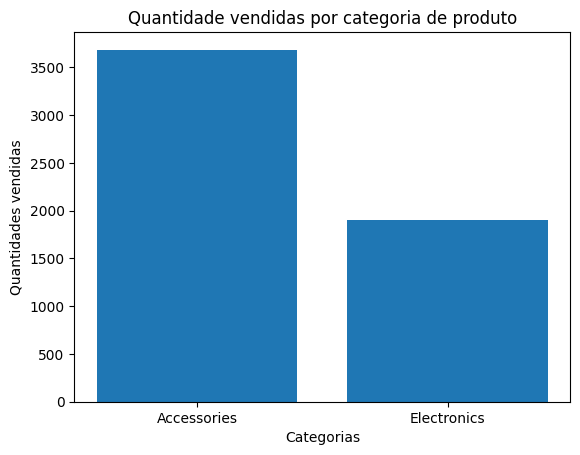

In [ ]:
# Resposta
categoria_quantidade = sales.groupby('Category')['Quantity'].sum().reset_index()

plt.bar(data = categoria_quantidade, x='Category', height = 'Quantity')
plt.title('Quantidade vendidas por categoria de produto')
plt.xlabel('Categorias')
plt.ylabel('Quantidades vendidas')

plt.show()

## Questão 6: Análise de Vendas por Mês



```
# Isto está formatado como código
```

Extraia o mês da coluna `Date`, crie uma nova coluna `Month` e calcule as vendas totais por mês.

Dica: Utilize `pd.to_datetime()` para converter a coluna `Date`, e então use `dt.month` para extrair o mês.

In [ ]:
# Resposta

sales['Date'] = pd.to_datetime(sales['Date'])

sales['Month'] = sales.Date.dt.month
sales.head()

,Order ID,Product,Category,Price,Quantity,Date,City,Payment Method,Total Sales,Month
0,101.0,Laptop,Electronics,1200.50,2.0,2023-01-15,New York,Credit Card,2401.00,1.0
1,102.0,Smartphone,Electronics,800.99,5.0,2023-02-20,Los Angeles,PayPal,4004.95,2.0
3,104.0,Monitor,Electronics,150.00,4.0,2023-03-18,Houston,Debit Card,600.00,3.0
4,105.0,Keyboard,Accessories,25.99,10.0,2023-04-10,Phoenix,Credit Card,259.90,4.0
5,106.0,Mouse,Accessories,19.99,12.0,2023-05-15,Philadelphia,Debit Card,239.88,5.0


In [ ]:
month_sales = sales.groupby('Month')['Total Sales'].sum().sort_values(ascending=False).reset_index()
month_sales

,Month,Total Sales
0,2.0,387700.25
1,3.0,274292.50
2,8.0,245628.75
3,1.0,175041.00
4,9.0,99458.25
5,6.0,66089.76
6,4.0,36504.30
7,5.0,27876.48
8,7.0,18126.75


## Questão 7: Histograma de Preços

Usando **Matplotlib**, crie um histograma para visualizar a distribuição dos preços dos produtos.

Dica: Use `plt.hist()` para criar o histograma, ajustando o número de bins para uma melhor visualização.

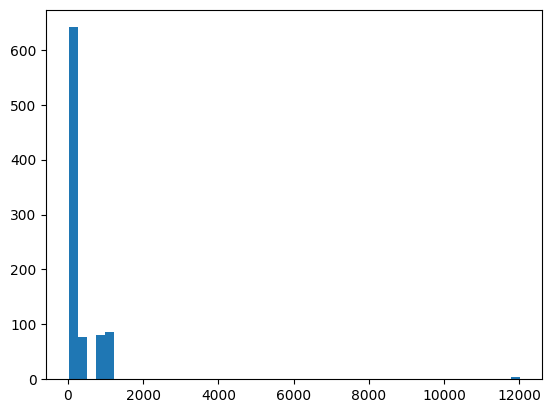

In [ ]:
# Resposta

plt.hist(data=sales, x='Price',bins=50)
plt.show()

## Questão 8: Vendas por Método de Pagamento

Crie um gráfico de setores (pizza) para mostrar a proporção de vendas por cada método de pagamento.

Dica: Utilize `groupby()` para somar as vendas por `Payment Method` e então `plt.pie()` para o gráfico.

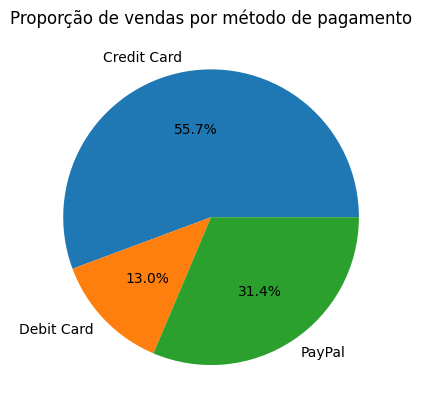

In [ ]:
# Resposta
vendas_pagamento = sales.groupby('Payment Method')['Price'].sum().reset_index()

plt.pie(data=vendas_pagamento, x='Price', labels='Payment Method', autopct='%1.1f%%')
plt.title('Proporção de vendas por método de pagamento')

plt.show()

## Questão 9: Correlação entre Preço e Quantidade Vendida

Usando **NumPy** e **Pandas**, verifique a correlação entre `Price` e `Quantity` para avaliar se existe uma relação entre o preço e a quantidade de itens vendidos.

Dica: Use `corr()` do **Pandas** ou `np.corrcoef()` para calcular a correlação.

In [ ]:
# Resposta

sales.Price.corr(sales.Quantity)

-0.07767450562052558

## Questão 10: Análise Temporal de Vendas



```
# Isto` está formatado como código`
```

Crie uma série temporal com o total de vendas diárias e plote um gráfico de linha para observar tendências ao longo do tempo.

Dica: Use `groupby()` com a coluna `Date` para somar as vendas diárias e `plot()` para gerar o gráfico de linha.

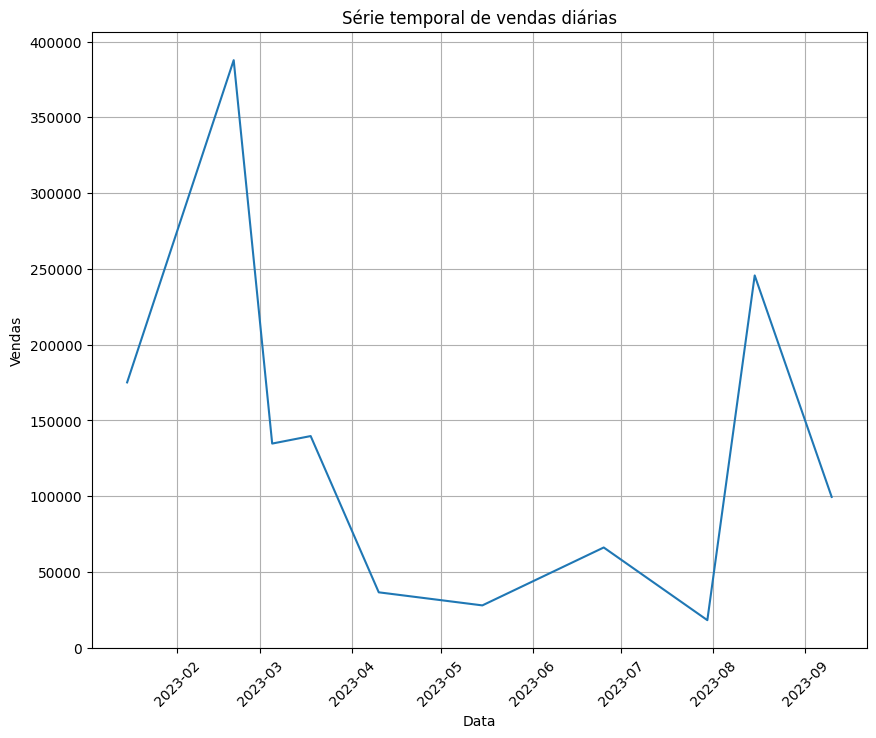

In [ ]:
# Resposta

data_vendas = sales.groupby('Date')['Total Sales'].sum().reset_index()

plt.figure(figsize=(10,8))
plt.plot(data_vendas['Date'], data_vendas['Total Sales'])
plt.title('Série temporal de vendas diárias')
plt.xlabel('Data')
plt.ylabel('Vendas')

plt.xticks(rotation=45)

plt.grid(True)
plt.show()

##Questão extra: Criar coluna de custo aleatório

In [ ]:
custos = []
for idx, row in sales.iterrows():

  margem_baixa = row['Price'] * 0.8
  margem_alta = row['Price']

  custo_aleatorio = np.random.uniform(low=margem_baixa, high=margem_alta, size=(1,))[0] * row['Quantity']
  custos.append(custo_aleatorio)

In [ ]:
sales['Custo'] = custos
sales.head()

,Order ID,Product,Category,Price,Quantity,Date,City,Payment Method,Total Sales,Month,Custo
0,101.0,Laptop,Electronics,1200.50,2.0,2023-01-15,New York,Credit Card,2401.00,1.0,2120.396723
1,102.0,Smartphone,Electronics,800.99,5.0,2023-02-20,Los Angeles,PayPal,4004.95,2.0,3876.811460
3,104.0,Monitor,Electronics,150.00,4.0,2023-03-18,Houston,Debit Card,600.00,3.0,594.179864
4,105.0,Keyboard,Accessories,25.99,10.0,2023-04-10,Phoenix,Credit Card,259.90,4.0,209.715531
5,106.0,Mouse,Accessories,19.99,12.0,2023-05-15,Philadelphia,Debit Card,239.88,5.0,215.080713


In [ ]:
sales['Lucro'] = sales['Total Sales'] - sales['Custo']
sales.head()

,Order ID,Product,Category,Price,Quantity,Date,City,Payment Method,Total Sales,Month,Custo,Lucro
0,101.0,Laptop,Electronics,1200.50,2.0,2023-01-15,New York,Credit Card,2401.00,1.0,2120.396723,280.603277
1,102.0,Smartphone,Electronics,800.99,5.0,2023-02-20,Los Angeles,PayPal,4004.95,2.0,3876.811460,128.138540
3,104.0,Monitor,Electronics,150.00,4.0,2023-03-18,Houston,Debit Card,600.00,3.0,594.179864,5.820136
4,105.0,Keyboard,Accessories,25.99,10.0,2023-04-10,Phoenix,Credit Card,259.90,4.0,209.715531,50.184469
5,106.0,Mouse,Accessories,19.99,12.0,2023-05-15,Philadelphia,Debit Card,239.88,5.0,215.080713,24.799287


In [ ]:
(sales['Lucro'] / sales['Total Sales'] ).mean()

0.10090732385853998

## Questão 11: Conclusão e Análise

Após realizar os exercícios acima, conduza uma análise final respondendo às seguintes perguntas sobre o conjunto de dados:

1. Quais foram as cinco cidades com maior volume de vendas?
2. Qual o impacto médio das margens de lucro na receita total?
3. Como podemos detectar os outliers presentes no nosso conjunto de dados?
4. Qual foi o método de pagamento mais utilizado e qual o menos utilizado?
5. Observou algum padrão sazonal nas vendas mensais?

Responda cada uma das perguntas acima com base nas análises realizadas.

## Respostas

1. As cidades que mais tiveram volume de vendas foram:

| **City**     | **Value**   |
|--------------|-------------|
| Los Angeles  | \$415,734.90 |
| Dallas       | \$249,678.75 |
| New York     | \$194,610.50 |
| Houston      | \$145,270.00 |
| Chicago      | \$144,210.75 |


2. Os lucros equivalem em média a 10% da receita

3. Utilizando o histograma foi possível observar os outliers, porém utilizar um boxplot é melhor

4. Cartão de crédito foi o mais utilizado, enquanto o cartão de débito foi o menos utilizado

5. No início do ano foi percebido um aumento das vendas até meados de fevereiro, porém durante o restante do primeiro semestre as vendas decaíram e se mantiveram constantes até o mês de agosto. Nesse período teve um aumento até meados de setembro e decaindo. Final para início do ano tiveram um aumento nas vendas e isso pode ser explicado pela as festividades do natal e ano novo.